### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Import data 

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header= None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Replacing column number by names


age = in years

sex =  1 = male & 0 = female

cp = chest pain  cp: chest pain ( 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic) 

trestbps = resting blood pressure (in mm Hg on admission to the hospital)

chol = serum cholestoral in mg/dl  

fbs = fasting blood sugar > 120 mg/dl (1 = true; 0 = false )

restecg = resting electrocardiographic results ( 0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy) 

thalach = maximum heart rate achieved

exang = exercise induced angina (1 = yes; 0 = no) 

oldpeak = ST depression induced by exercise relative to rest 

slope = he slope of the peak exercise ST segment( 1: upsloping, 2: flat, Value 3: downsloping ) 

ca = number of major vessels (0-3) colored by flourosopy

thal = 3 = normal; 6 = fixed defect; 7 = reversable defect 

hd =diagnosis of heart disease (angiographic disease status) ( 0: < 50% diameter narrowing, Value 1: > 50% diameter narrowing )

In [3]:
df. columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Identifying missing data 

In [4]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

* ca (number of major vessels)  and thal  variable should be numbers instade of object 

In [5]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [6]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

### Dealing with missing data

In [7]:
#finding the missing value rows 
df.loc[(df['ca'] == '?')|(df['thal'] == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [8]:
#Making new data frame without having any missing vale 
df = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
display(df.head())
print("The nmber of observation after removing all missing values:",len(df))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


The nmber of observation after removing all missing values: 297


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    object 
 12  thal      297 non-null    object 
 13  hd        297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


* No null or missing values

In [10]:
# using apply method converting 'ca' and 'thal' to numaric
df[['ca', 'thal']] = df[['ca', 'thal']].apply(pd.to_numeric)
print(df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
hd            int64
dtype: object


### Spliting data into dependent and independent variable

In [11]:
# Selecting independent variables
X = df.drop('hd', axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [12]:
# Selecting dependent variables
y = df['hd']
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

### Perform one hot encoding on catagorical variablse

In [13]:
X = pd.get_dummies(X, columns = ['cp', 'restecg', 'slope', 'thal'])
X.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


There are five classification of dpendent variablbe i.e; heart deasis. 

For keeping the classifications simple, we shall simply classify if the patient has heart deasis or not. 

so, while

y=0 (no heart deasis)

y > 0 (heart deasis)

In [14]:
y_non_zero = y > 0 #inlcuding all non zero values in y
y[y_non_zero] = 1 # converting all y_non_zero values in 1
y.unique()

array([0, 1], dtype=int64)

### Building classification tree

In [15]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Create decision tree and fit to the train data 

model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)

(207, 22) (90, 22) (207,) (90,)


### Tree Diagram

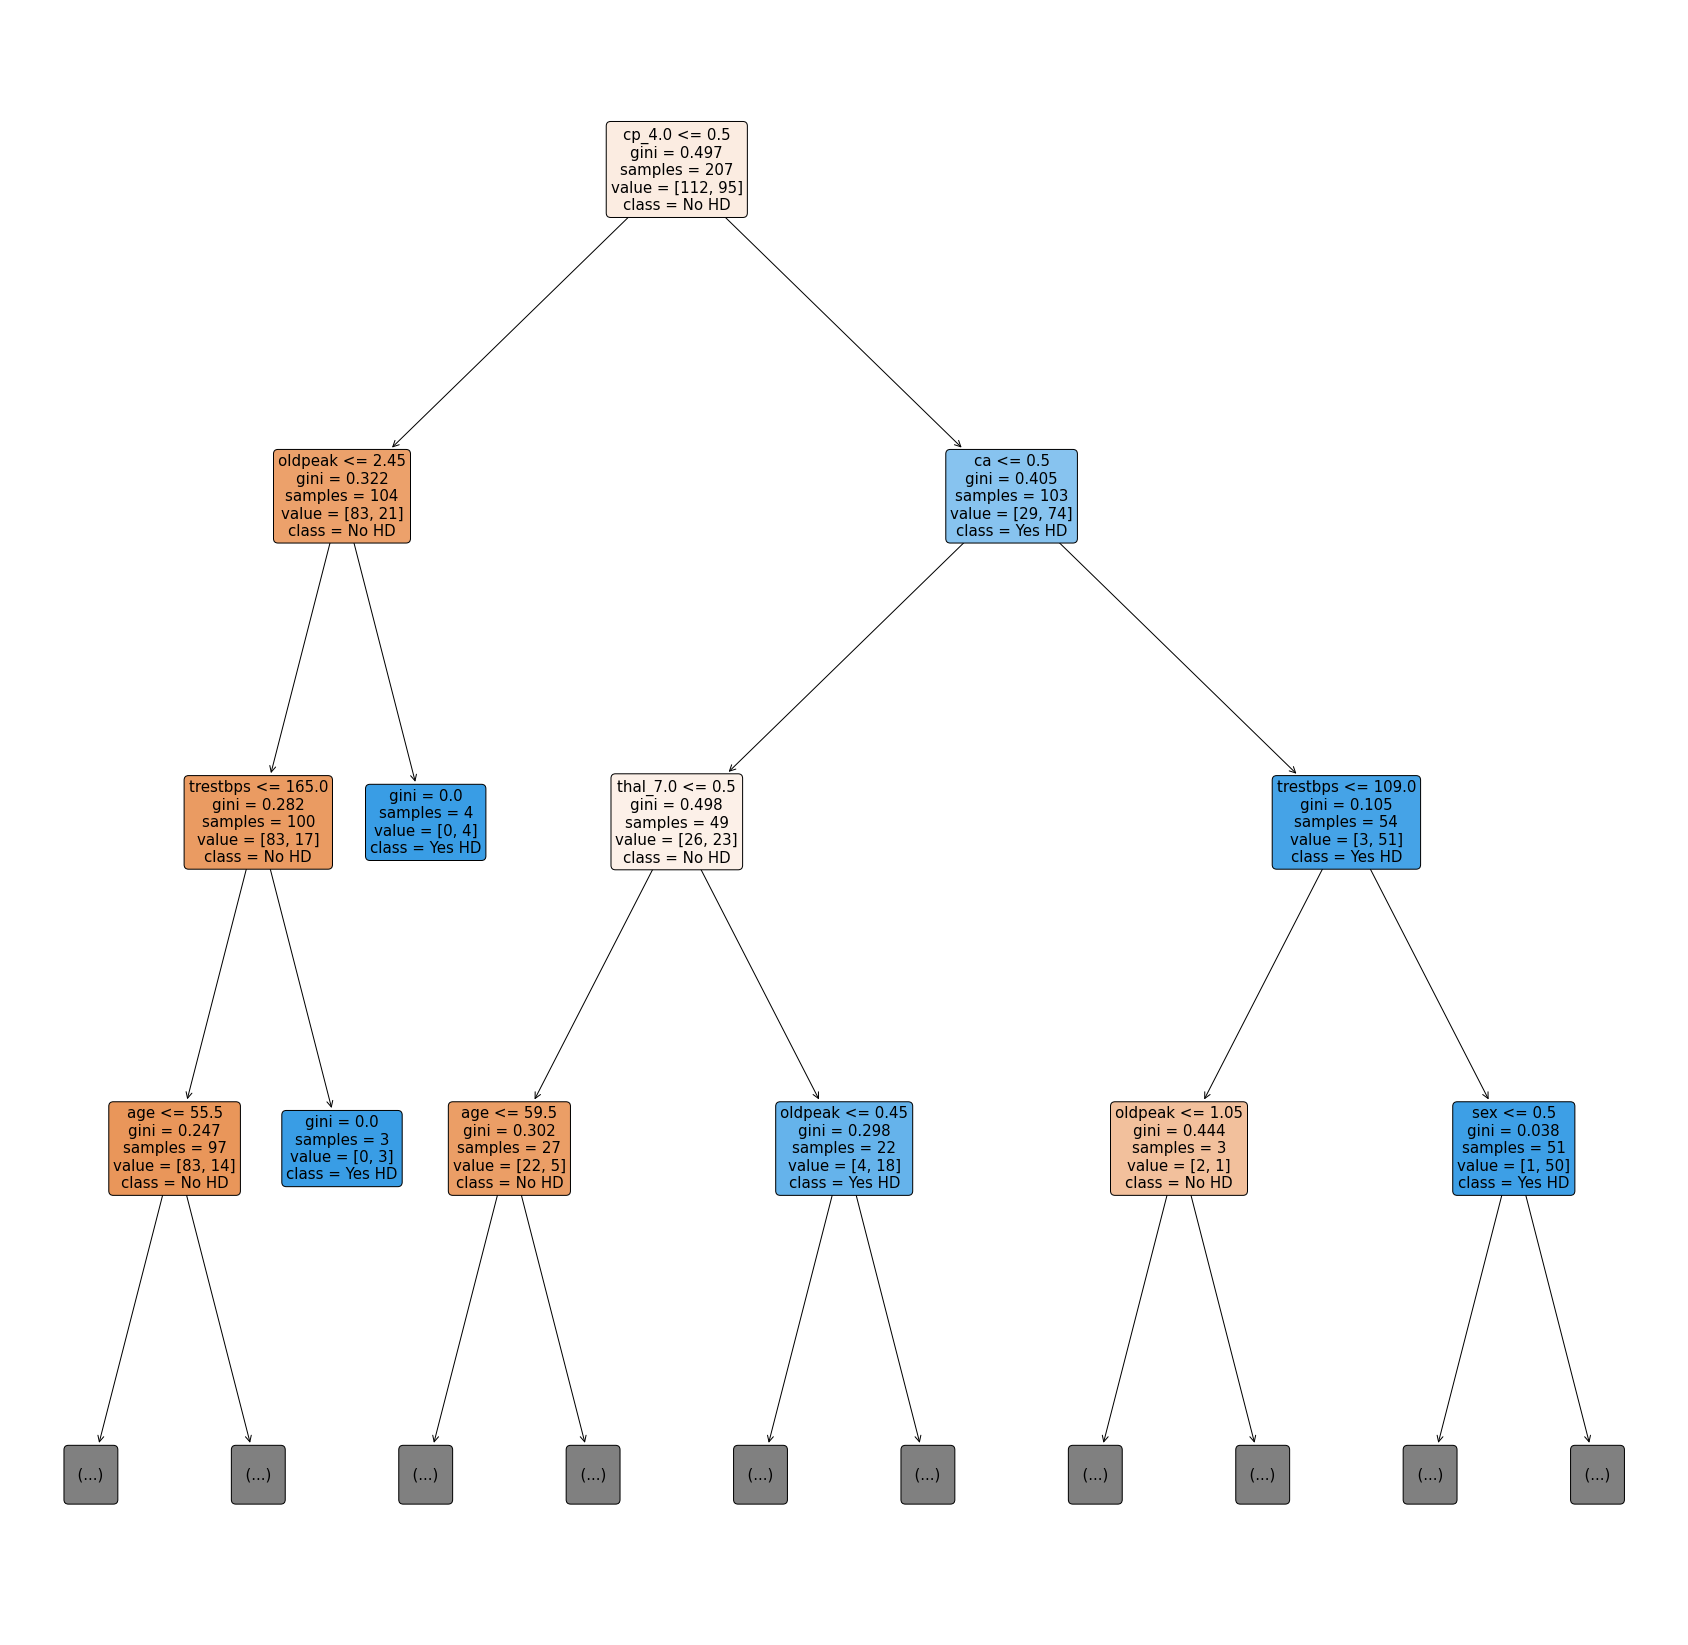

In [16]:
plt.figure(figsize = (30,30))
plot_tree(model_DT,filled=True,rounded=True,
          class_names = ["No HD", "Yes HD"],feature_names = X.columns,
          max_depth=3,fontsize=15)

plt.show()

### Confusion matrix 

In [17]:
y_pred_DT = model_DT.predict(X_test)

confusion_matrix_ = confusion_matrix(y_test,y_pred_DT)

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[40  8]
 [18 24]]


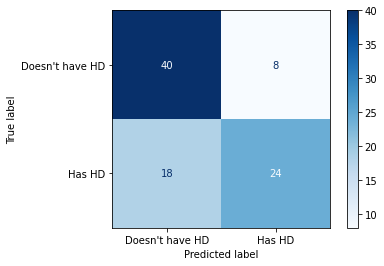

In [18]:
plot_confusion_matrix(model_DT,X_test, y_test, display_labels=["Doesn't have HD", "Has HD"],cmap='Blues')
plt.show()

<br> From above confusion matrix, we can see that,
<br> out of 48 Patients who don't have Heart disease, it predicted 40 accurately
<br> and out of 32 Patients who have Heart disease, it predicted 24 accurately

### Accuracy

Accuracy:  0.7111111111111111
              precision    recall  f1-score   support

           0       0.69      0.83      0.75        48
           1       0.75      0.57      0.65        42

    accuracy                           0.71        90
   macro avg       0.72      0.70      0.70        90
weighted avg       0.72      0.71      0.71        90



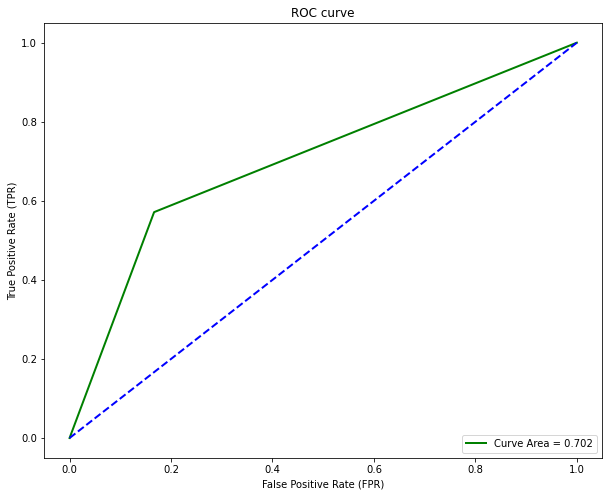

In [19]:
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))

fpr, tpr, thr = roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred_DT)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

<br> From above ROC figure, we can see that
<br> AUC ic 70.2%. That means 70.2% of data hasbeen correctly classified by the algorithm.